<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Titillium+Web:ital,wght@0,200;0,300;0,400;0,600;0,700;0,900;1,200;1,300;1,400;1,600;1,700&display=swap" rel="stylesheet">
<div class="box" style="padding: 10px; margin: 10px 0; background-color: gray; color: white; border-radius: 5px; font-size: 15px;">
  <table style="padding: 10px; margin: auto auto; background-color: gray;  border-radius: 5px; font-size: 15px;">
      <tr>
          <th colspan='2'><h1 style="text-align: center">
Machine Learning </br>
</h1>
<h2 style="text-align: center">
Course Assignment Two </br>
</h2>
</th>
<tr>
    <tr>
      <th colspan="2">Personal Info</th>
    </tr>
    <tr>
      <td>First Name:</td>
      <td>Ali</td>
    </tr>
    <tr>
      <td>Last Name:</td>
      <td>Nikkhah</td>
    </tr>
    <tr>
      <td>Student Number:</td>
      <td>99102445</td>
    </tr>
    <tr>
      <td>Github:</td>
      <td><a href="https://github.com/AliNikkhah2001/MachineLearning02" target="_blank">https://github.com/AliNikkhah2001/MachineLearning02</a></td>
    </tr>
  </table>
</div>



### **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np

## **Part 1**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

we start by first printing description of the dataset, then we show illustrative plots that lead to normalization of the dataset.

In [ ]:
# Load the dataset
boston_df = pd.read_csv("Q1/Boston.csv")

# Display the first few rows of the dataset to understand its structure
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


 The Boston Housing Dataset description

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollar
- PTRATIO - pupil-teacher ratio by town
- B  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT -  lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

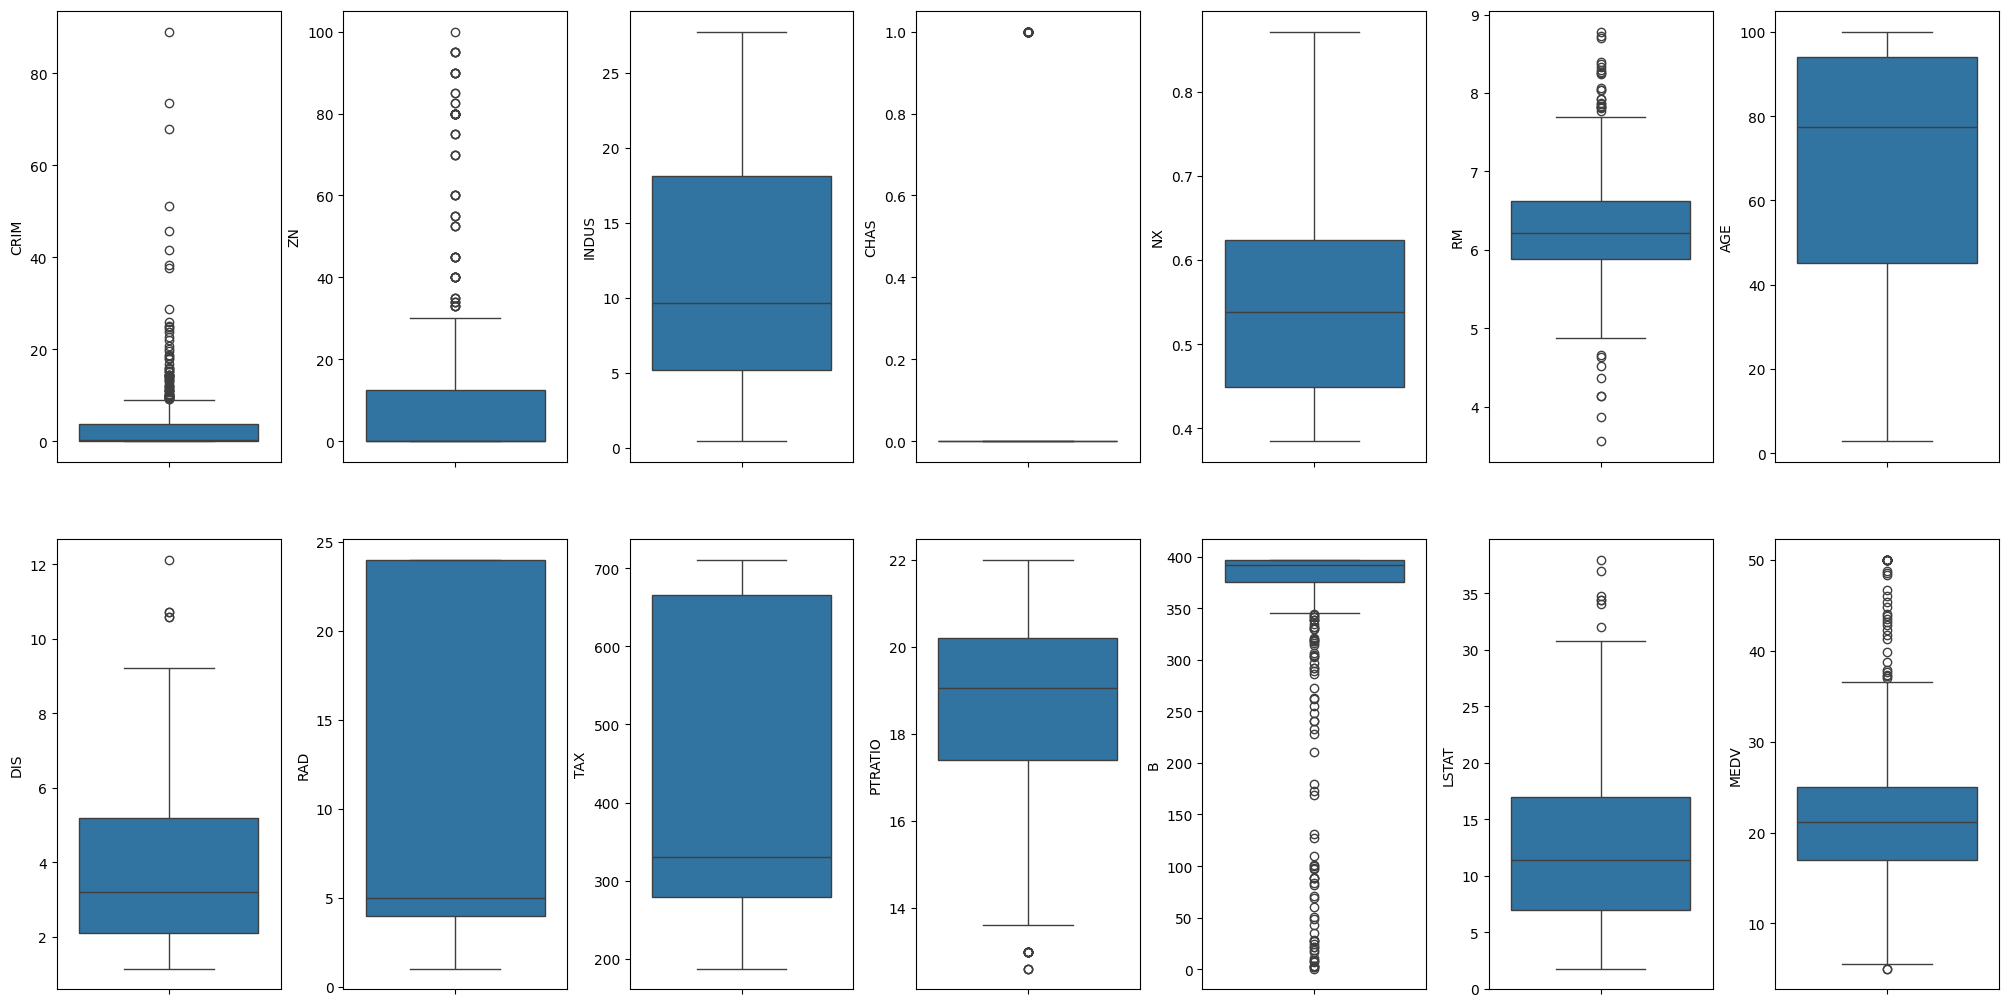

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.boxplot(y=k, data=boston_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

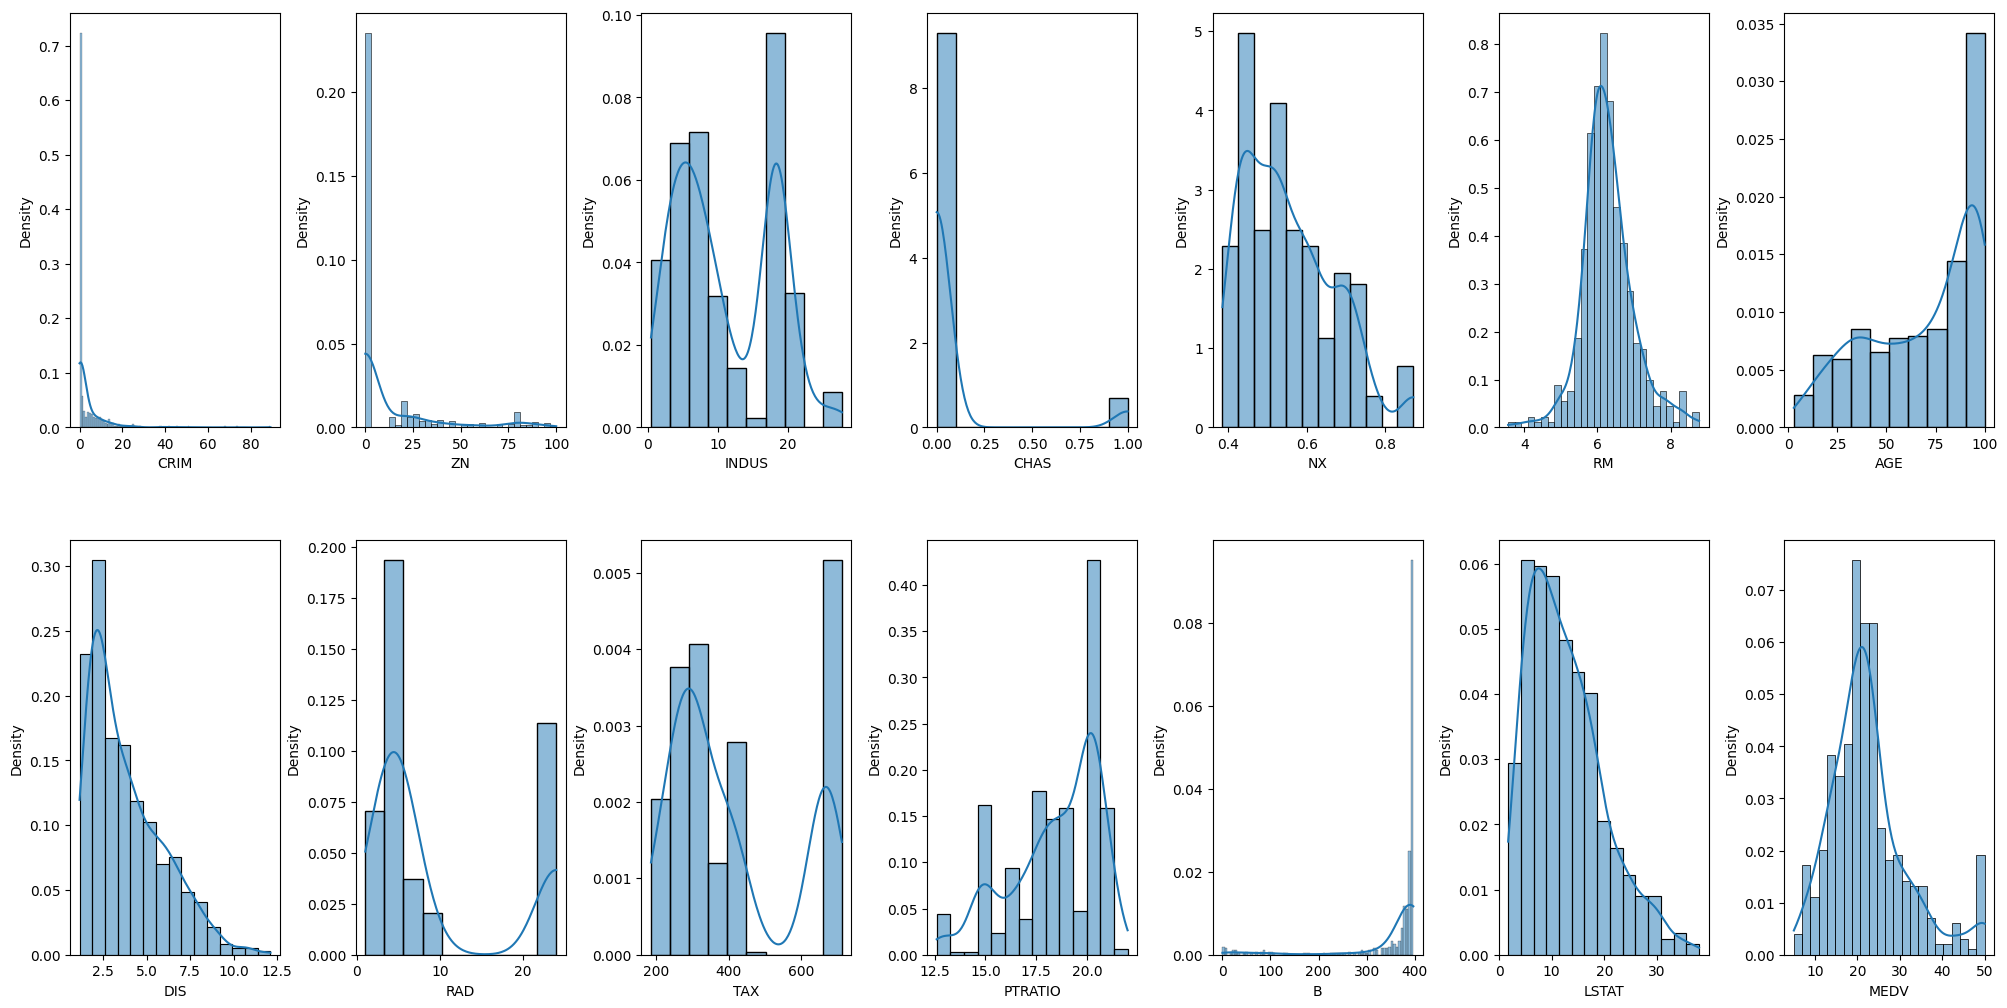

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

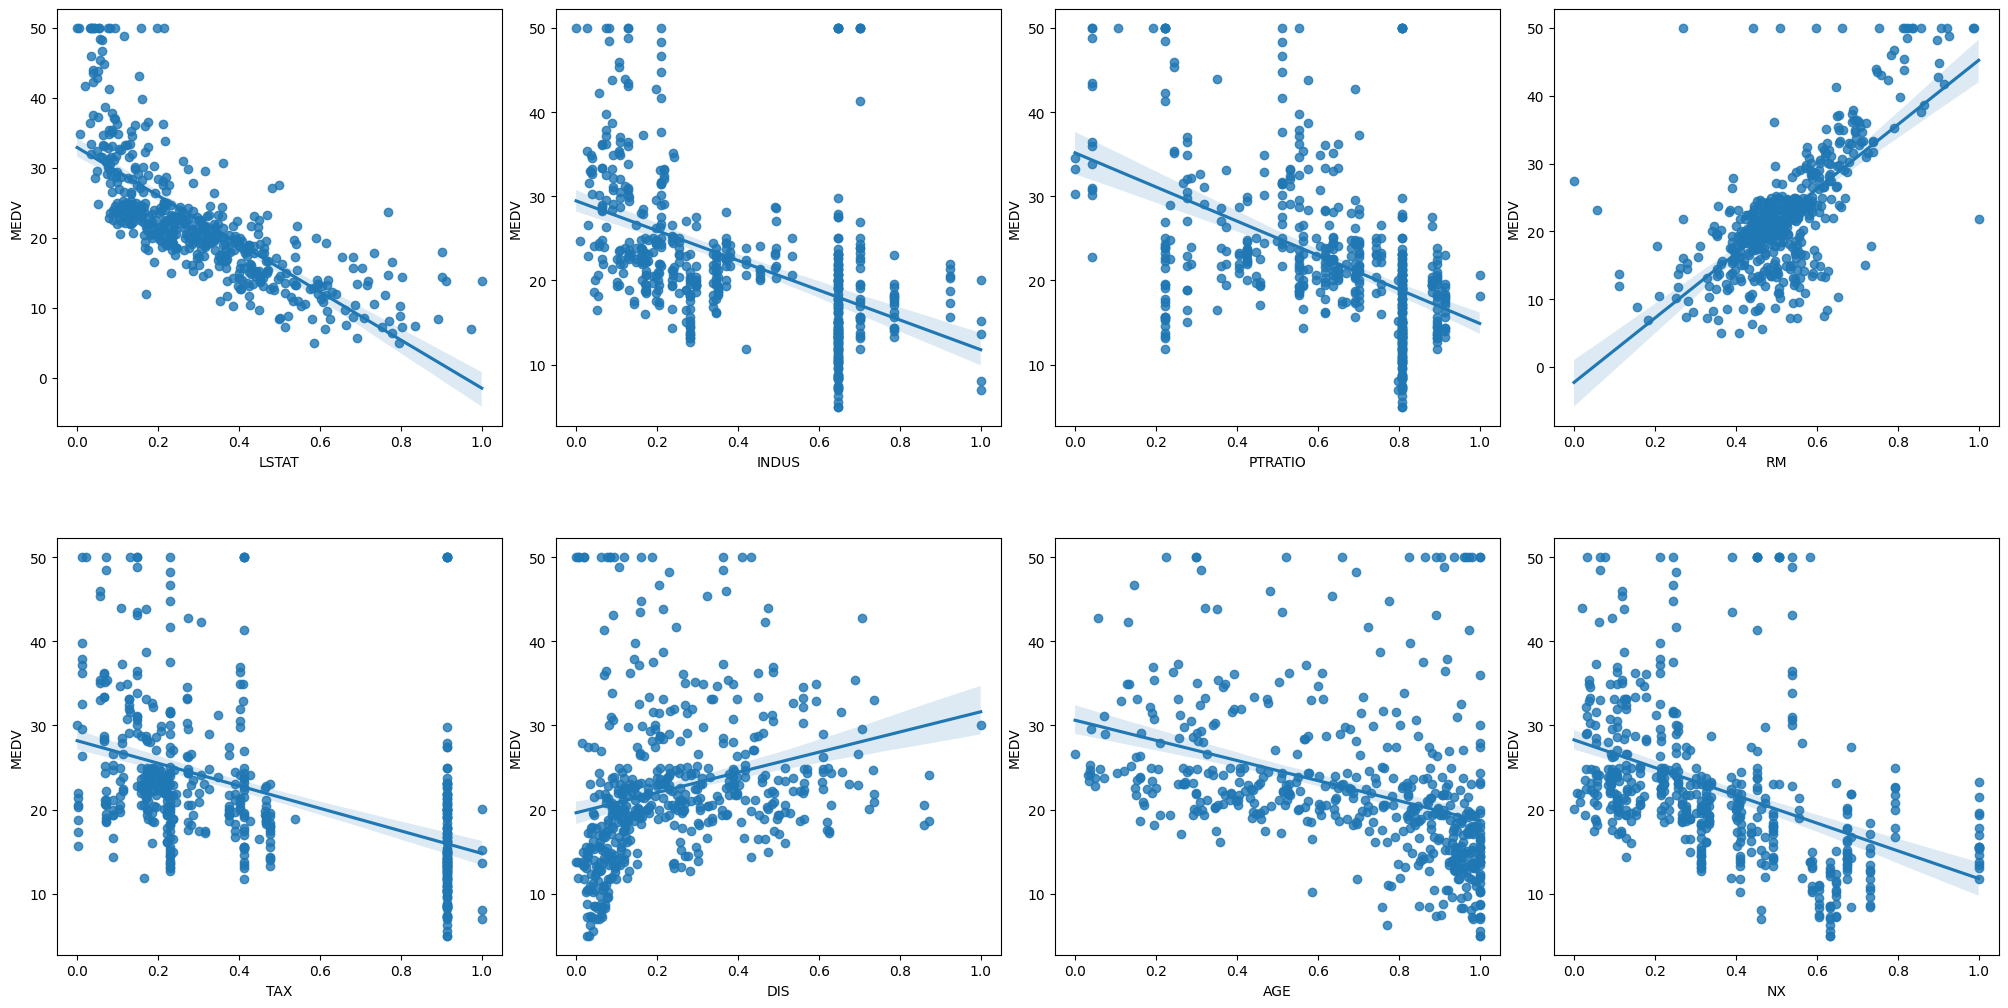

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE','NX']
x = boston_df.loc[:,column_sels]
y = boston_df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## **Part 2**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:
# Split the dataset into train and test sets
X = boston_df.drop(columns=['MEDV'])  # Features
y = boston_df['MEDV']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training set
train_pred = model.predict(X_train)

# Predict on test set
test_pred = model.predict(X_test)

# Calculate R^2 scores
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

# Get coefficients
coefficients = model.coef_

print("Train R^2 score:", train_r2)
print("Test R^2 score:", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Coefficients:", coefficients)

Train R^2 score: 0.7508856358979673
Test R^2 score: 0.6687594935356288
Train RMSE: 4.6520331848801675
Test RMSE: 4.928602182665361
Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]




| Metric            | Train            | Test             |
|-------------------|------------------|------------------|
| R^2 Score         | 0.7509           | 0.6688           |
| RMSE              | 4.6520           | 4.9286           |

Formulas:
- R^2 Score: $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$
- RMSE: $$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{true} - y_{pred})^2}$$

 ## **Part 3**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

$$ \text{minimize} \left( \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{true} - y_{pred})^2} + \alpha \sum_{j=1}^{p} \omega_j^2 \right)$$

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

In [ ]:
# Define alphas
alphas = 10 ** np.linspace(3, -3, 100)*0.5

# Initialize lists to store results
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

for alpha in alphas:
    # Train ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predict on training set
    train_pred = ridge_model.predict(X_train)

    # Predict on test set
    test_pred = ridge_model.predict(X_test)

    # Calculate MSE for training and test sets
    train_mse.append(mean_squared_error(y_train, train_pred))
    test_mse.append(mean_squared_error(y_test, test_pred))

    # Store coefficients
    coefficients.append(ridge_model.coef_)

    # Count number of features with coefficient equal to zero
    not_considered_features.append(np.sum(ridge_model.coef_ == 0))

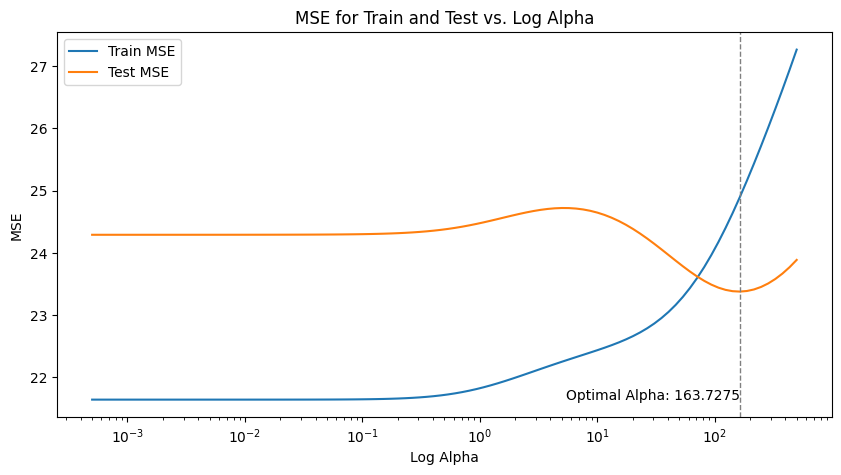

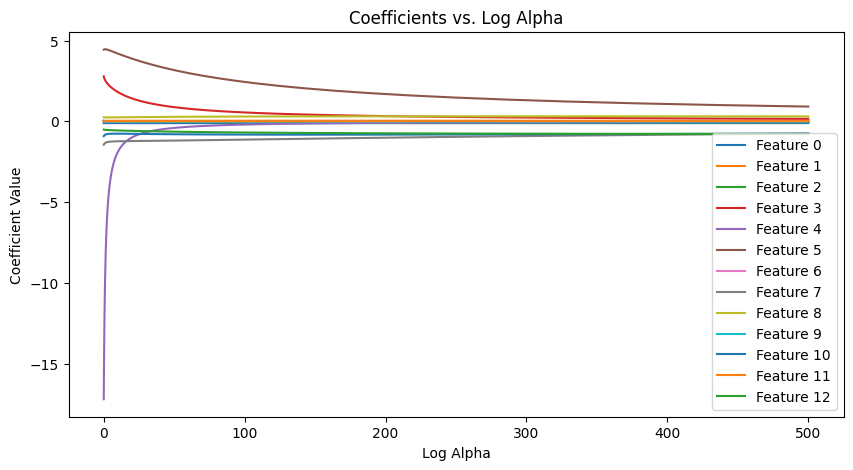

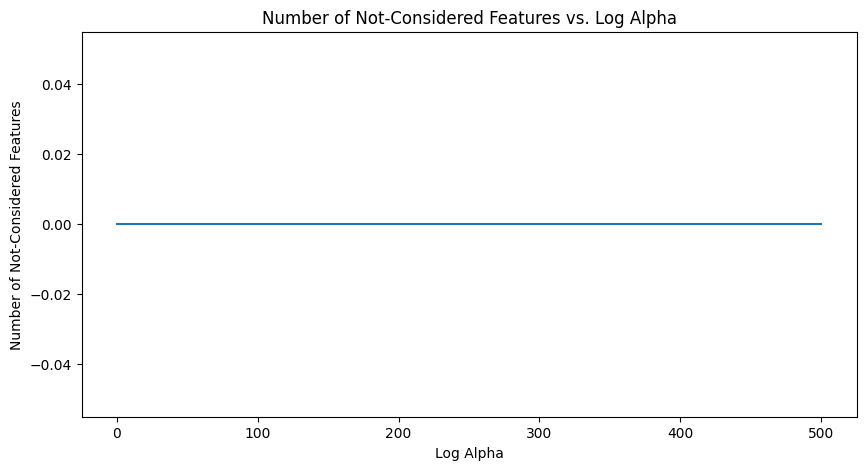

Optimal Alpha (Derivative Zero): 163.72745814388642
Optimal Alpha (Train MSE) : 0.0005
Optimal Alpha (Test MSE) : 163.72745814388642


In [ ]:

# Find the alpha where the derivative equals zero
optimal_alpha = alphas[np.argmin(np.abs(test_mse))]

# Plot MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, train_mse, label='Train MSE')
plt.semilogx(alphas, test_mse, label='Test MSE')
plt.xlabel('Log Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Log Alpha')
plt.legend()

# Plot the horizontal dashed line at the lowest point of the training MSE
plt.axvline(x=optimal_alpha, color='gray', linestyle='--', linewidth=1)
plt.text(optimal_alpha, min(train_mse), f'Optimal Alpha: {optimal_alpha:.4f}',
         horizontalalignment='right')

plt.show()

# Plot coefficients versus α
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i}')
plt.xlabel('Log Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Log Alpha')
plt.legend()
plt.show()

# Plot Number of not-considered features versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features)
plt.xlabel('Log Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Log Alpha')
plt.show()

# Report results
print("Optimal Alpha (Derivative Zero):", optimal_alpha)
print("Optimal Alpha (Train MSE) :", alphas[np.argmin(train_mse)])
print("Optimal Alpha (Test MSE) :", alphas[np.argmin(test_mse)])


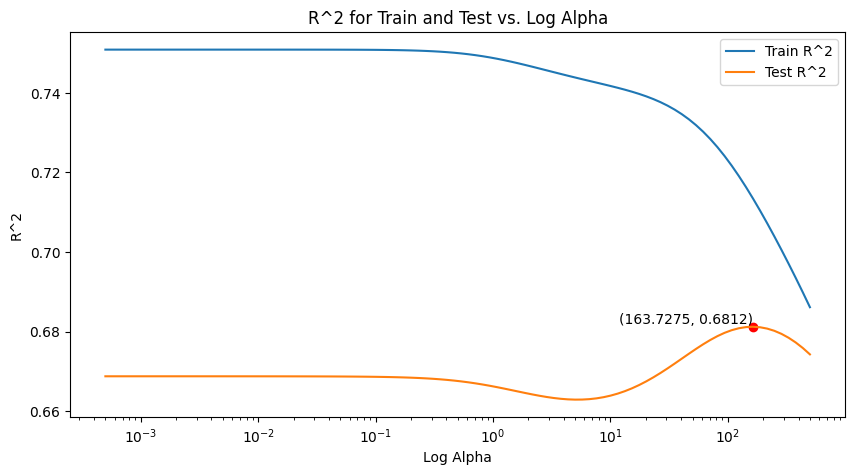

Optimal Alpha (Test MSE Minimized): 163.72745814388642
Optimal Alpha R^2: 0.6812087531281752


In [ ]:
# Initialize lists to store R^2 values
train_r2 = []
test_r2 = []

for alpha in alphas:
    # Train ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predict on training set
    train_pred = ridge_model.predict(X_train)

    # Predict on test set
    test_pred = ridge_model.predict(X_test)

    # Calculate R^2 for training and test sets
    train_r2.append(ridge_model.score(X_train, y_train))
    test_r2.append(ridge_model.score(X_test, y_test))

# Find the index of the optimal alpha where the test MSE is minimized
optimal_alpha_idx = np.argmin(test_mse)

# Find the corresponding R^2 value for the optimal alpha
optimal_alpha_r2 = test_r2[optimal_alpha_idx]

# Plot R^2 for train and test versus α
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, train_r2, label='Train R^2')
plt.semilogx(alphas, test_r2, label='Test R^2')
plt.xlabel('Log Alpha')
plt.ylabel('R^2')
plt.title('R^2 for Train and Test vs. Log Alpha')
plt.legend()

# Plot the optimal alpha point on the curve
plt.scatter(alphas[optimal_alpha_idx], optimal_alpha_r2, color='red', label=f'Optimal Alpha ({alphas[optimal_alpha_idx]:.4f}, {optimal_alpha_r2:.4f})')
plt.text(alphas[optimal_alpha_idx], optimal_alpha_r2, f'({alphas[optimal_alpha_idx]:.4f}, {optimal_alpha_r2:.4f})',
         horizontalalignment='right', verticalalignment='bottom')

plt.show()

# Report results
print("Optimal Alpha (Test MSE Minimized):", alphas[optimal_alpha_idx])
print("Optimal Alpha R^2:", optimal_alpha_r2)


## Explanation:

as we could have guessed earlier,Ridge regression squared term of parameters tends to make absolute value of parameters smaller, but it doesn't set any parameter value to zero during training.


![lasso regression](https://miro.medium.com/v2/resize:fit:761/1*nrWncnoJ4V_BkzEf1pd4MA.png)


Ridge regression is a type of linear regression that introduces a regularization term to the loss function, in order to prevent overfitting by imposing a penalty on the size of the coefficients. Mathematically, the loss function for Ridge regression can be written as:

$$
L_{\text{Ridge}} = \text{MSE} + \lambda \sum_{j=1}^{p} \theta_j^2
$$

The regularization term is added to the ordinary least squares loss function. This term penalizes the model for having large coefficients, effectively shrinking them towards zero.

Ridge regression works by finding the coefficients that minimize the combined loss function. By adjusting the values of the coefficients, Ridge regression finds a balance between fitting the training data well and keeping the coefficients small to avoid overfitting.

However, even though Ridge regression penalizes the size of the coefficients, it does not force them to reach exactly zero unless $\lambda$ is extremely large. This is because the penalty term $\lambda \sum_{j=1}^{p} \theta_j^2$ is continuous and smooth, allowing the coefficients to be reduced but not completely eliminated. As \( \lambda \) increases, the coefficients tend to become smaller, but they will never be exactly zero in Ridge regression unless $\lambda$ approaches infinity.

This property of Ridge regression makes it suitable for situations where all features are relevant to the prediction task, as it will not completely discard any feature, but rather reduce their impact on the model according to their importance in predicting the target variable.

## **Part 4**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

In [ ]:
from sklearn.linear_model import Lasso

# Define alphas
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Initialize lists to store results
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

for alpha in alphas:
    # Train Lasso regression model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Predict on training set
    train_pred = lasso_model.predict(X_train)

    # Predict on test set
    test_pred = lasso_model.predict(X_test)

    # Calculate MSE for training and test sets
    train_mse.append(mean_squared_error(y_train, train_pred))
    test_mse.append(mean_squared_error(y_test, test_pred))

    # Store coefficients
    coefficients.append(lasso_model.coef_)

    # Count number of features with coefficient equal to zero
    not_considered_features.append(np.sum(lasso_model.coef_ == 0))


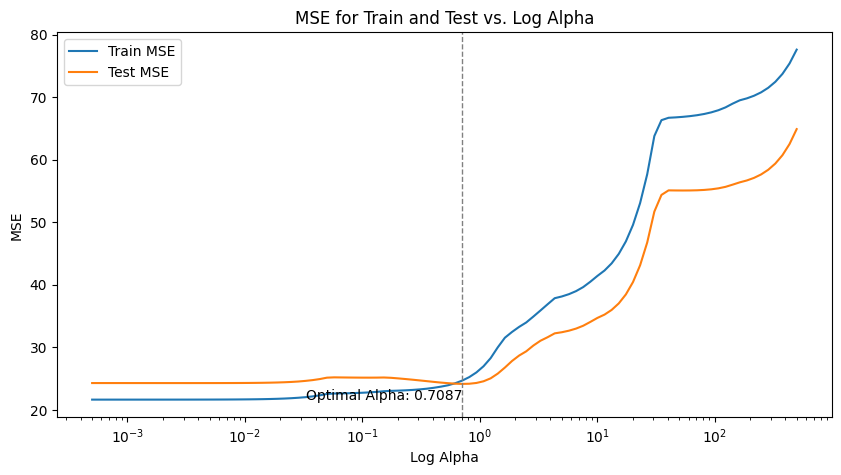

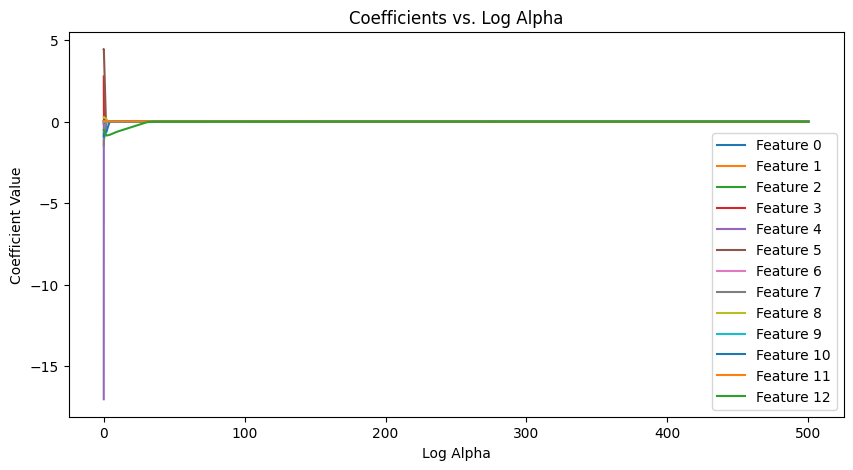

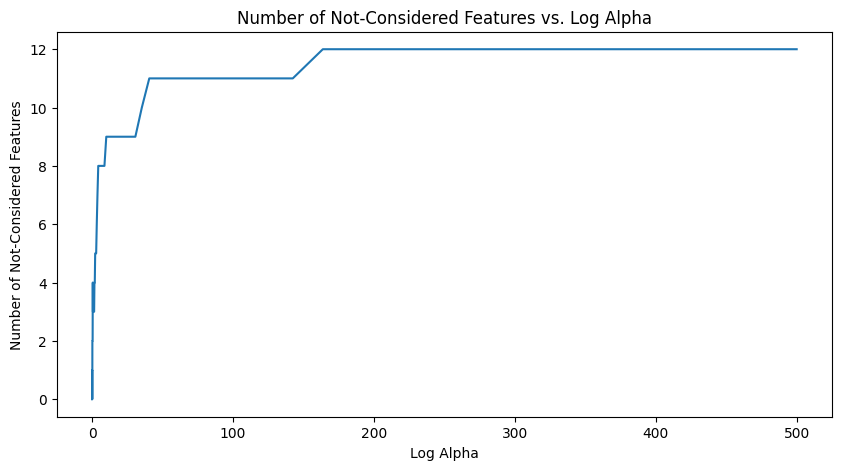

Optimal Alpha (Test MSE Minimized): 0.7087370814634024
Optimal Alpha Train MSE: 0.0005
Optimal Alpha Test MSE: 0.7087370814634024


In [ ]:
# Find the alpha where the test MSE is minimized
optimal_alpha = alphas[np.argmin(test_mse)]

# Plot MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, train_mse, label='Train MSE')
plt.semilogx(alphas, test_mse, label='Test MSE')
plt.xlabel('Log Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Log Alpha')
plt.legend()

# Plot the horizontal dashed line at the lowest point of the training MSE
plt.axvline(x=optimal_alpha, color='gray', linestyle='--', linewidth=1)
plt.text(optimal_alpha, min(train_mse), f'Optimal Alpha: {optimal_alpha:.4f}',
         horizontalalignment='right')

plt.show()

# Plot coefficients versus α
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i}')
plt.xlabel('Log Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Log Alpha')
plt.legend()
plt.show()

# Plot Number of not-considered features versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features)
plt.xlabel('Log Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Log Alpha')
plt.show()

# Report results
print("Optimal Alpha (Test MSE Minimized):", optimal_alpha)
print("Optimal Alpha Train MSE:", alphas[np.argmin(train_mse)])
print("Optimal Alpha Test MSE:", alphas[np.argmin(test_mse)])


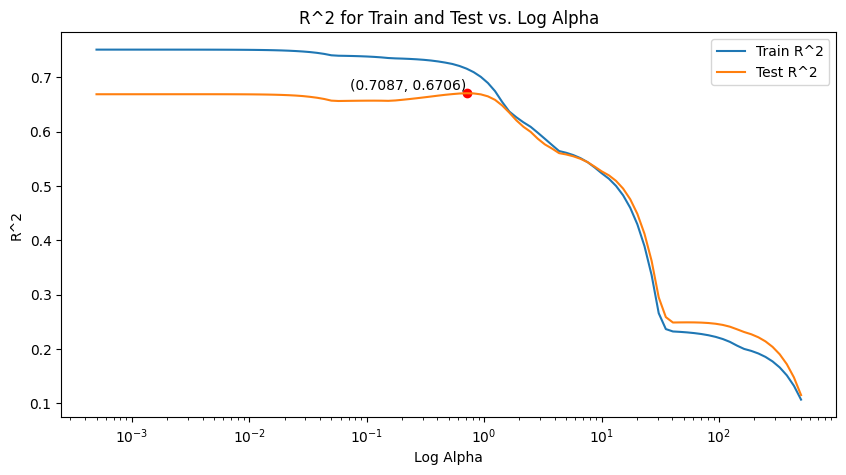

Optimal Alpha (Test MSE Minimized): 0.7087370814634024
Optimal Alpha R^2: 0.6706399397086964


In [ ]:
from sklearn.linear_model import Lasso

# Initialize lists to store R^2 values
train_r2 = []
test_r2 = []

for alpha in alphas:
    # Train Lasso regression model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Predict on training set
    train_pred = lasso_model.predict(X_train)

    # Predict on test set
    test_pred = lasso_model.predict(X_test)

    # Calculate R^2 for training and test sets
    train_r2.append(lasso_model.score(X_train, y_train))
    test_r2.append(lasso_model.score(X_test, y_test))

# Find the index of the optimal alpha where the test MSE is minimized
optimal_alpha_idx = np.argmin(test_mse)

# Find the corresponding R^2 value for the optimal alpha
optimal_alpha_r2 = test_r2[optimal_alpha_idx]

# Plot R^2 for train and test versus α
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, train_r2, label='Train R^2')
plt.semilogx(alphas, test_r2, label='Test R^2')
plt.xlabel('Log Alpha')
plt.ylabel('R^2')
plt.title('R^2 for Train and Test vs. Log Alpha')
plt.legend()

# Plot the optimal alpha point on the curve
plt.scatter(alphas[optimal_alpha_idx], optimal_alpha_r2, color='red', label=f'Optimal Alpha ({alphas[optimal_alpha_idx]:.4f}, {optimal_alpha_r2:.4f})')
plt.text(alphas[optimal_alpha_idx], optimal_alpha_r2, f'({alphas[optimal_alpha_idx]:.4f}, {optimal_alpha_r2:.4f})',
         horizontalalignment='right', verticalalignment='bottom')

plt.show()

# Report results
print("Optimal Alpha (Test MSE Minimized):", alphas[optimal_alpha_idx])
print("Optimal Alpha R^2:", optimal_alpha_r2)


### As we saw, big values of alpha will lead to early set of all the coefficients to zero, so we shorthen the higher band for alpha values for a better model training and representation of the training process.

In [ ]:
from sklearn.linear_model import Lasso

# Define alphas
alphas = 10 ** np.linspace(1, -3, 100) * 0.5

# Initialize lists to store results
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

for alpha in alphas:
    # Train Lasso regression model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Predict on training set
    train_pred = lasso_model.predict(X_train)

    # Predict on test set
    test_pred = lasso_model.predict(X_test)

    # Calculate MSE for training and test sets
    train_mse.append(mean_squared_error(y_train, train_pred))
    test_mse.append(mean_squared_error(y_test, test_pred))

    # Store coefficients
    coefficients.append(lasso_model.coef_)

    # Count number of features with coefficient equal to zero
    not_considered_features.append(np.sum(lasso_model.coef_ == 0))


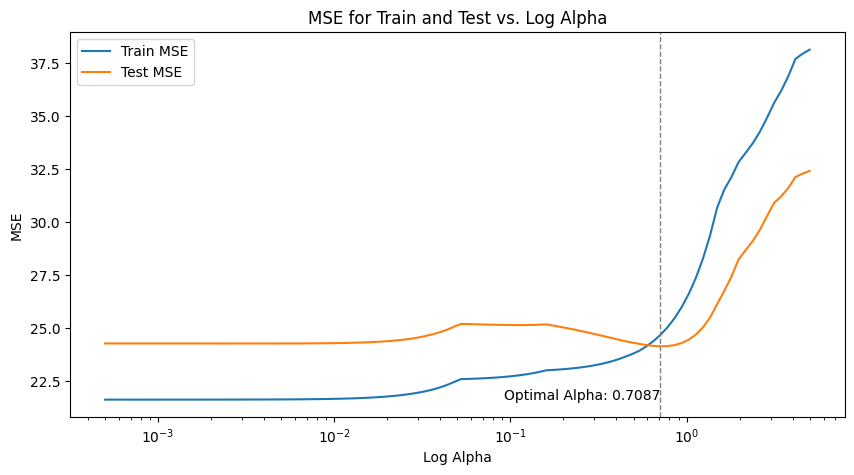

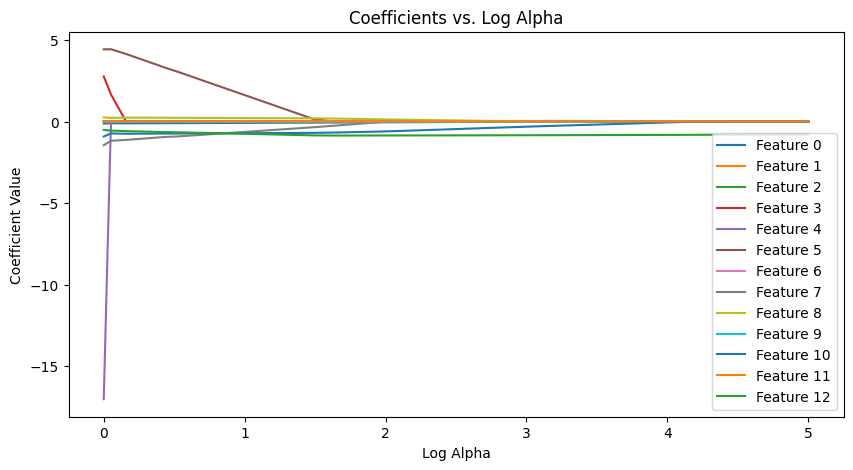

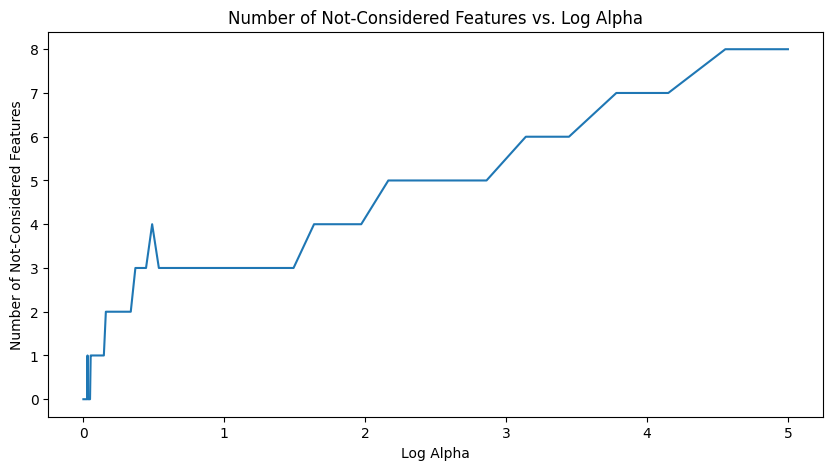

In [ ]:
# Find the alpha where the test MSE is minimized
optimal_alpha = alphas[np.argmin(test_mse)]

# Plot MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, train_mse, label='Train MSE')
plt.semilogx(alphas, test_mse, label='Test MSE')
plt.xlabel('Log Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Log Alpha')
plt.legend()

# Plot the horizontal dashed line at the lowest point of the training MSE
plt.axvline(x=optimal_alpha, color='gray', linestyle='--', linewidth=1)
plt.text(optimal_alpha, min(train_mse), f'Optimal Alpha: {optimal_alpha:.4f}',
         horizontalalignment='right')

plt.show()

# Plot coefficients versus α
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i}')
plt.xlabel('Log Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Log Alpha')
plt.legend()
plt.show()

# Plot Number of not-considered features versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features)
plt.xlabel('Log Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Log Alpha')
plt.show()




# Explanation
![lasso regression](https://miro.medium.com/v2/resize:fit:761/1*nrWncnoJ4V_BkzEf1pd4MA.png)
Lasso regression, like Ridge regression, is a type of linear regression that adds a regularization term to the loss function. However, Lasso regression uses the \( L_1 \) norm of the coefficients as the regularization term, whereas Ridge regression uses the \( L_2 \) norm. Mathematically, the loss function for Lasso regression can be written as:

$$
L_{\text{Lasso}} = \text{MSE} + \lambda \sum_{j=1}^{p} |\theta_j|
$$


The regularization term $\lambda \sum_{j=1}^{p} |\theta_j|$ is added to the ordinary least squares loss function. This term encourages sparsity in the coefficients by penalizing large coefficient values.

Lasso regression works by finding the coefficients  $\theta$ that minimize the combined loss function. Due to the $L_1$ regularization term, Lasso regression tends to produce sparse solutions, where many of the coefficients are exactly zero. This means that Lasso regression can effectively perform feature selection by eliminating irrelevant features from the model.

The reason parameters can reach exactly zero in Lasso regression is due to the shape of the $L_1$ norm. Unlike the $L_2$ norm used in Ridge regression, the $L_1$ norm has sharp corners at the axes. This sharpness at the corners encourages some coefficients to be exactly zero when the regularization parameter $\lambda$ is sufficiently large. As $\lambda$ increases, the penalty for having non-zero coefficients becomes stronger, leading more coefficients to be driven to exactly zero.

This property of Lasso regression makes it particularly useful for situations where feature selection is important, as it can automatically discard irrelevant features from the model by setting their coefficients to zero.

## **Part 5**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

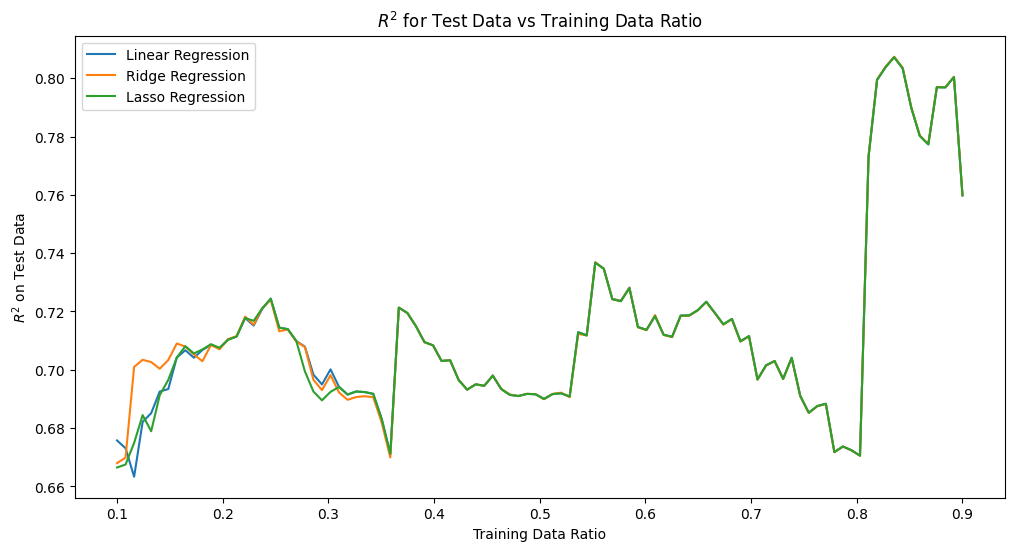

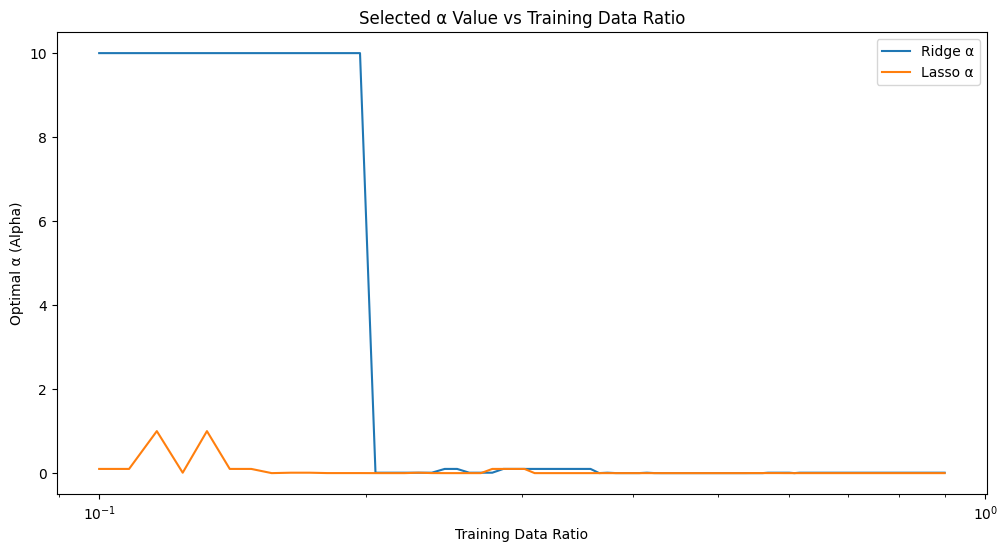

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score

# Load the data
boston_data_path = 'Boston.csv'
data = pd.read_csv(boston_data_path)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Define different training data ratios
training_ratios = np.linspace(0.1, 0.9, 100)  # From 10% to 90% training data

# Arrays to store results
test_r2_linear = []
test_r2_ridge = []
test_r2_lasso = []
optimal_alpha_ridge = []
optimal_alpha_lasso = []

for ratio in training_ratios:
    # Split the data according to the current ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    test_r2_linear.append(r2_score(y_test, y_pred_linear))

    # Ridge Regression with cross-validation to select the best alpha
    ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13))
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    test_r2_ridge.append(r2_score(y_test, y_pred_ridge))
    optimal_alpha_ridge.append(ridge_model.alpha_)

    # Lasso Regression with cross-validation to select the best alpha
    lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), max_iter=10000)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    test_r2_lasso.append(r2_score(y_test, y_pred_lasso))
    optimal_alpha_lasso.append(lasso_model.alpha_)

# Plotting R^2 for test data vs training data ratio
plt.figure(figsize=(12, 6))
plt.plot(training_ratios, test_r2_linear, label='Linear Regression')
plt.plot(training_ratios, test_r2_ridge, label='Ridge Regression')
plt.plot(training_ratios, test_r2_lasso, label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('$R^2$ on Test Data')
plt.title('$R^2$ for Test Data vs Training Data Ratio')
plt.legend()

# Plotting selected alpha value vs training data ratio for Ridge and Lasso
plt.figure(figsize=(12, 6))
plt.plot(training_ratios, optimal_alpha_ridge, label='Ridge α')
plt.plot(training_ratios, optimal_alpha_lasso, label='Lasso α')
plt.xscale('log')
plt.xlabel('Training Data Ratio')
plt.ylabel('Optimal α (Alpha)')
plt.title('Selected α Value vs Training Data Ratio')
plt.legend()

plt.show()


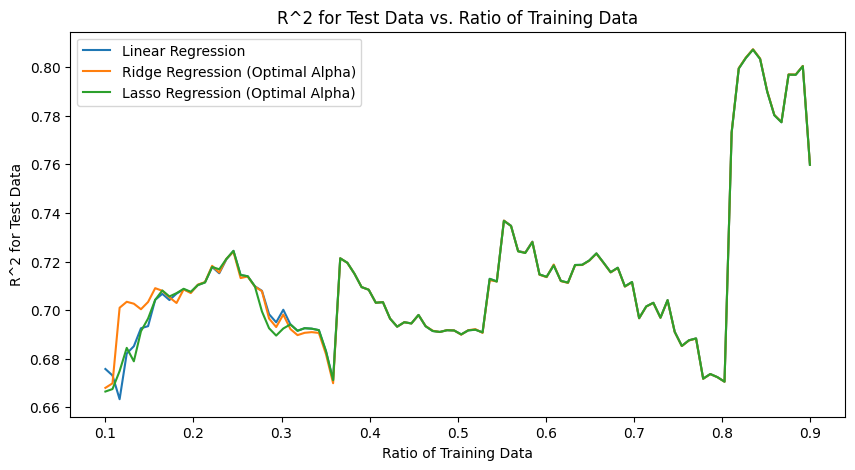

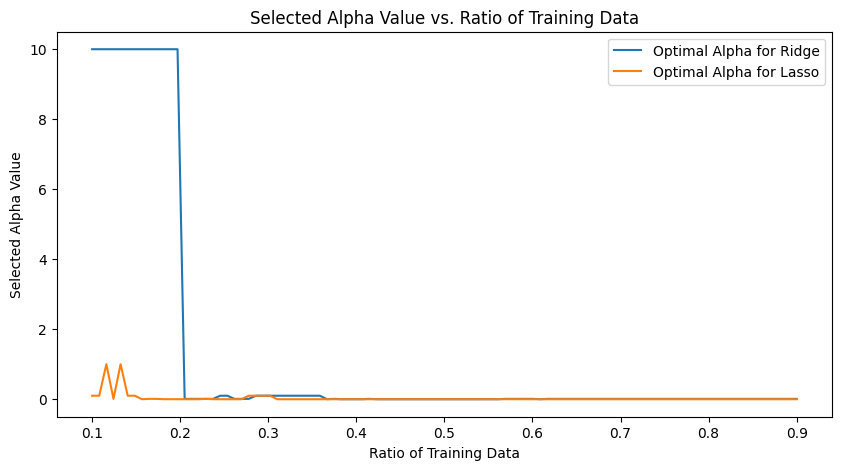

In [5]:
# Ratios - assumed to be your array of training data ratios
ratios = training_ratios

# Plot R^2 for test data versus ratio of training data
plt.figure(figsize=(10, 5))
plt.plot(ratios, test_r2_linear, label='Linear Regression')
plt.plot(ratios, test_r2_ridge, label='Ridge Regression (Optimal Alpha)')
plt.plot(ratios, test_r2_lasso, label='Lasso Regression (Optimal Alpha)')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2 for Test Data')
plt.title('R^2 for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot selected alpha value versus training data ratio for Ridge and Lasso Regression
plt.figure(figsize=(10, 5))
plt.plot(ratios, optimal_alpha_ridge, label='Optimal Alpha for Ridge')
plt.plot(ratios, optimal_alpha_lasso, label='Optimal Alpha for Lasso')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs. Ratio of Training Data')
plt.legend()
plt.show()

### Results

$$
\textbf{Impact of Lasso and Ridge Regression on Overfitting}
$$

$$
\textbf{Ridge Regression:}
$$

Ridge regression introduces a penalty term to the loss function that penalizes the size of the coefficients. This penalty encourages the model to shrink the coefficients towards zero, effectively reducing the complexity of the model. By reducing the magnitude of the coefficients, Ridge regression helps prevent overfitting by limiting the model's ability to fit noise in the data. However, Ridge regression does not force coefficients to be exactly zero, allowing all features to contribute to the prediction to some extent. This makes Ridge regression particularly useful when all features are relevant to the prediction task but might still be prone to overfitting due to multicollinearity or high dimensionality.

$$
\textbf{Lasso Regression:}
$$

Lasso regression, similar to Ridge regression, adds a penalty term to the loss function to prevent overfitting. However, Lasso regression uses the $L_1$ norm of the coefficients as the penalty term, which has the effect of sparsity-inducing regularization. This means that Lasso regression tends to produce sparse solutions where many coefficients are exactly zero. By setting some coefficients to zero, Lasso regression performs feature selection and effectively eliminates irrelevant features from the model. This not only reduces the complexity of the model but also improves interpretability by identifying the most important features for prediction. Lasso regression is especially beneficial when dealing with high-dimensional datasets with many irrelevant features, as it helps mitigate the risk of overfitting by selecting only the most relevant features for the task.

In summary, both Ridge and Lasso regression are effective techniques for mitigating overfitting in regression models. Ridge regression reduces the magnitude of coefficients, while Lasso regression performs feature selection by setting some coefficients to zero. These regularization techniques help strike a balance between bias and variance, ultimately improving the generalization performance of the model on unseen data.